In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load data
file_path = 'dataKasus-1.xlsx'  
df = pd.read_excel(file_path, sheet_name='2022')

# Tampilkan beberapa baris pertama
df.head()


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [13]:
# Hapus kolom yang tidak diperlukan
df_cleaned = df.drop(columns=['Unnamed: 12'])

# Konversi kolom 'USIA' menjadi numerik
df_cleaned['USIA'] = df_cleaned['USIA'].str.extract('(\d+)').astype(float)

# Standarisasi kolom biner menjadi format 1/0
binary_cols = ['RIW HIPERTENSI', 'RIW PE', 'OBESITAS', 'RIW DM', 'RIW HIPERTENSI/PE DALAM KELUARGA', 'SOSEK RENDAH', 'PE/Non PE']
df_cleaned[binary_cols] = df_cleaned[binary_cols].applymap(lambda x: 1 if x == 'Ya' or x == 'PE' else 0)

# Tampilkan data setelah dibersihkan
df_cleaned.head()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\NHQE1\AppData\Local\Temp\ipykernel_15812\2399114.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_cleaned['USIA'] = df_cleaned['USIA'].str.extract('(\d+)').astype(float)
C:\Users\NHQE1\AppData\Local\Temp\ipykernel_15812\2399114.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned[binary_cols] = df_cleaned[binary_cols].applymap(lambda x: 1 if x == 'Ya' or x == 'PE' else 0)


,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE
0,1,NAMA 1,23.0,3,< 2 tahun,0,0,0,1,0,0,0
1,2,NAMA 2,29.0,2,< 2 tahun,0,0,0,0,0,0,1
2,3,NAMA 3,20.0,1,anak pertama,0,0,0,0,0,0,0
3,4,NAMA 4,18.0,1,anak pertama,0,0,0,0,0,0,0
4,5,NAMA 5,34.0,3,> 2 tahun,0,0,0,0,0,0,0


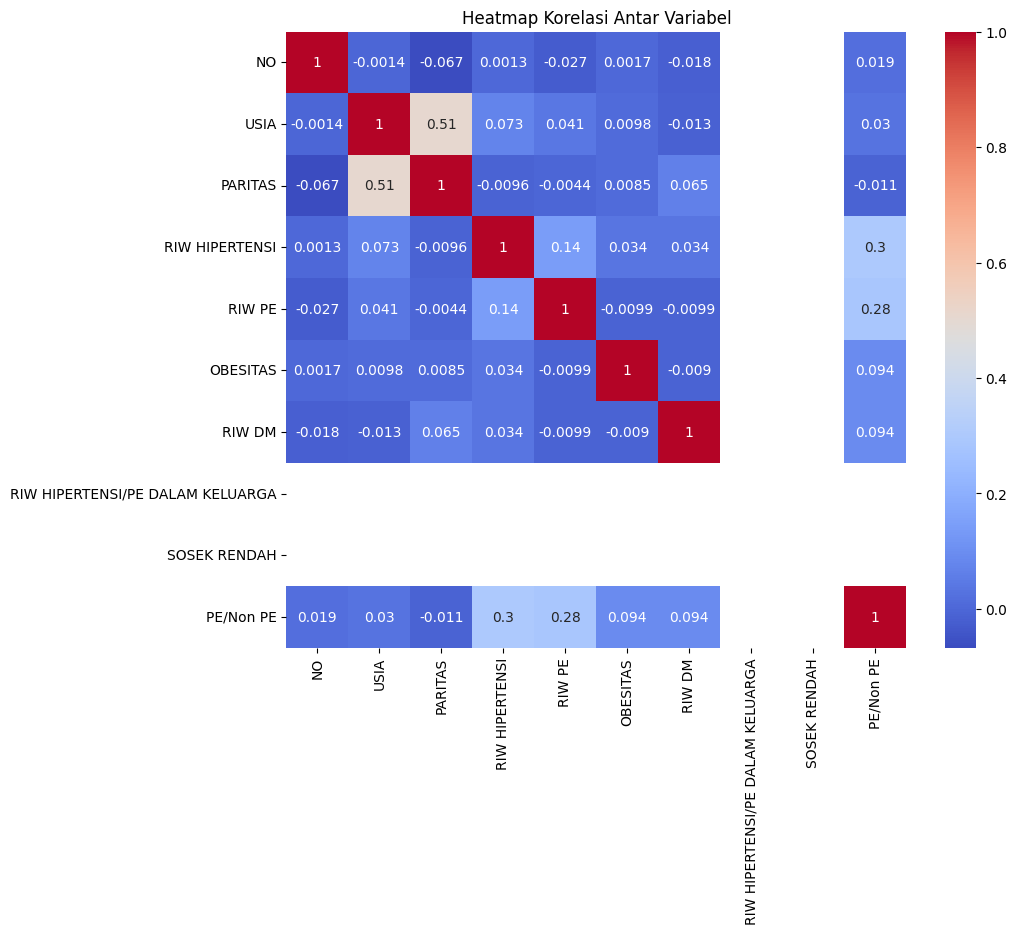

In [15]:
# Hanya memilih kolom numerik untuk analisis korelasi
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Korelasi antar variabel numerik
correlation_matrix = numeric_cols.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


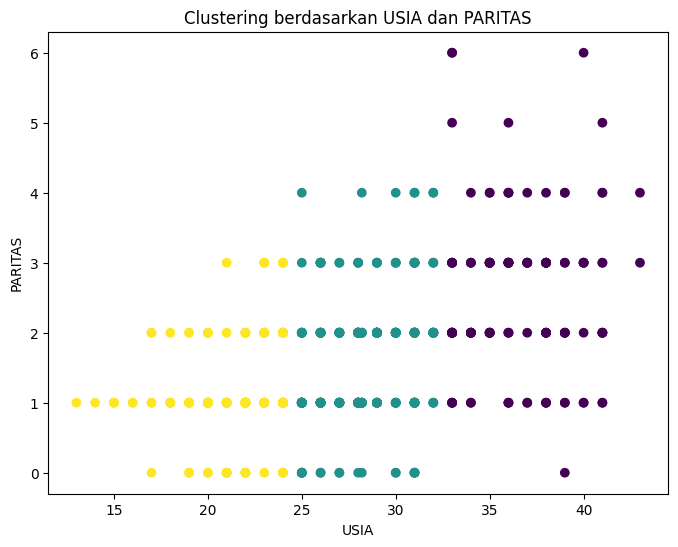

In [16]:
##Mengisi (Imputing) missing values: Mengisi missing values dengan nilai seperti rata-rata, median, atau modus.
from sklearn.impute import SimpleImputer

# Membuat imputer untuk mengisi missing values dengan nilai rata-rata
imputer = SimpleImputer(strategy='mean')

# Mengisi missing values pada kolom yang digunakan untuk clustering
X = df_cleaned[['USIA', 'PARITAS']]
X_imputed = imputer.fit_transform(X)

# Melakukan clustering dengan K-Means pada data yang sudah diisi
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(X_imputed)

# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('USIA')
plt.ylabel('PARITAS')
plt.title('Clustering berdasarkan USIA dan PARITAS')
plt.show()


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       0.00      0.00      0.00         6

    accuracy                           0.95       113
   macro avg       0.47      0.50      0.49       113
weighted avg       0.90      0.95      0.92       113



C:\Users\NHQE1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NHQE1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NHQE1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

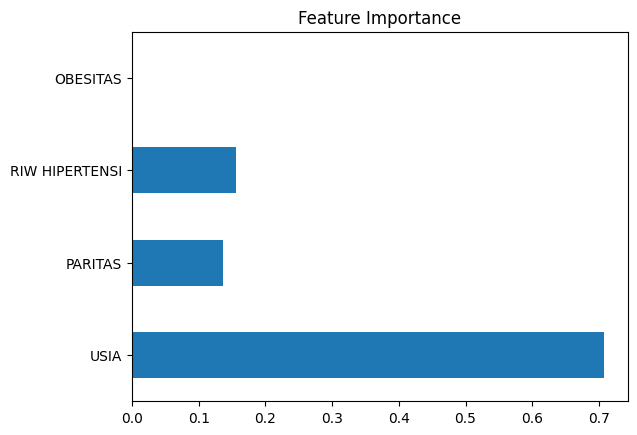

In [17]:
# Definisikan fitur dan label (target)
X = df_cleaned[['USIA', 'PARITAS', 'RIW HIPERTENSI', 'OBESITAS']]
y = df_cleaned['PE/Non PE']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Visualisasi pentingnya fitur dalam model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh', title='Feature Importance')
plt.show()


##